### This notebook is for additional carbonate chemistry evaluations, including Puget Sound (Thanks to Karyn).
#### Observation data were obtained from: https://www.ncei.noaa.gov/access/ocean-carbon-acidification-data-system/oceans/SalishCruise_DataPackage.html and
#### /ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_MODEVAL/Datasets
Observation-model matches are from: beluga for 2015-2018, to compare with v202111 (Karyn's Eval, https://github.com/SalishSeaCast/analysis-karyn/blob/master/notebooks/Evaluations/OA_PugetSound_CarbonateChem_ModelObsPlots_v202111_qualcontrol_matchbySalinity.ipynb)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, viz_tools
import matplotlib as mpl
import cmocean
from collections import OrderedDict
import netCDF4 as nc
from matplotlib.colors import LogNorm

fs=14
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [3]:
d15_202111 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bySalinityKaryn_20150101_20151231.csv')
d16_202111 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bySalinityKaryn_20160101_20161231.csv')
d17_202111 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bySalinityKaryn_20170101_20171231.csv')
d18_202111 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bySalinityKaryn_20180101_20181231.csv')
d15_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20150101_20151231.csv')
d16_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20160101_20161231.csv')
d17_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20170101_20171231.csv')
d18_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20180101_20181231.csv')

data_202111x = pd.concat([d15_202111, d16_202111, d17_202111, d18_202111,
                       ], ignore_index=True)
data_202410 = pd.concat([d15_202410, d16_202410, d17_202410, d18_202410,
                       ], ignore_index=True)

In [32]:
data_202410

,Unnamed: 0.2,Unnamed: 0.1,Cruise,dtUTC,Time,Lat,Lon,Z,Temp (degC),Temp (CT degC),...,YMO,j,i,mod_dissolved_inorganic_carbon,mod_total_alkalinity,mod_dissolved_oxygen,mod_votemper,mod_vosaline,matched_salinity,broadregions
0,0,949,NaN,2015-04-01,NaN,48.6500,-123.5000,1.500,9.9160,10.045312,...,2015-04-01,353,207,1849.958862,1992.091675,304.541443,9.754603,27.312281,27.312280,NaN
1,1,950,NaN,2015-04-01,NaN,48.6500,-123.5000,6.500,9.0920,9.183276,...,2015-04-01,353,207,1995.933472,2073.539307,221.543137,9.146894,29.082539,29.082539,NaN
2,2,951,NaN,2015-04-01,NaN,48.6500,-123.5000,11.600,9.0630,9.152077,...,2015-04-01,353,207,2002.387085,2079.002686,219.343704,9.144765,29.191883,29.191883,NaN
3,3,952,NaN,2015-04-01,NaN,48.6500,-123.5000,21.800,9.0330,9.119351,...,2015-04-01,353,207,2007.238403,2083.342041,217.948013,9.147735,29.278879,29.278880,NaN
4,4,953,NaN,2015-04-01,NaN,48.6500,-123.5000,31.600,8.9640,9.044746,...,2015-04-01,353,207,2023.362671,2097.147461,212.913712,9.166942,29.560349,29.560349,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1030,3659,NORSEMANIIOCT2018,2018-10-19,2:19:36,48.2728,-123.0193,50.522,9.3542,9.384381,...,2018-10-01,247,231,2219.648682,2255.978760,120.393791,8.789722,32.661236,32.661236,NaN
3627,1031,3658,NORSEMANIIOCT2018,2018-10-19,2:18:19,48.2728,-123.0193,80.431,8.4832,8.494975,...,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984,NaN
3628,1032,3664,NORSEMANIIOCT2018,2018-10-19,14:59:15,47.7028,-122.4535,80.542,11.8712,11.937513,...,2018-10-01,97,244,2089.909668,2169.147461,157.867584,11.271900,30.931124,30.931124,NaN
3629,1033,3657,NORSEMANIIOCT2018,2018-10-19,2:17:15,48.2728,-123.0193,104.412,8.3984,8.406372,...,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984,NaN


In [5]:
data_202111x

,Unnamed: 0.2,Unnamed: 0.1,Cruise,dtUTC,Time,Lat,Lon,Z,Temp (degC),Temp (CT degC),...,Month,YMO,j,i,mod_dissolved_inorganic_carbon,mod_total_alkalinity,mod_dissolved_oxygen,mod_votemper,mod_vosaline,matched_salinity
0,0,949,NaN,2015-04-01,NaN,48.6500,-123.5000,1.500,9.9160,10.045312,...,4,2015-04-01,353,207,1849.998779,1998.155029,318.898438,9.404975,27.212872,27.212872
1,1,950,NaN,2015-04-01,NaN,48.6500,-123.5000,6.500,9.0920,9.183276,...,4,2015-04-01,353,207,2003.139893,2084.700195,226.781693,9.123006,29.137440,29.137440
2,2,951,NaN,2015-04-01,NaN,48.6500,-123.5000,11.600,9.0630,9.152077,...,4,2015-04-01,353,207,2003.139893,2084.700195,226.781693,9.123006,29.137440,29.137440
3,3,952,NaN,2015-04-01,NaN,48.6500,-123.5000,21.800,9.0330,9.119351,...,4,2015-04-01,353,207,2021.384766,2091.777100,217.685944,9.150779,29.310953,29.310953
4,4,953,NaN,2015-04-01,NaN,48.6500,-123.5000,31.600,8.9640,9.044746,...,4,2015-04-01,353,207,2026.085693,2102.118896,218.520950,9.161661,29.512922,29.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1030,3659,NORSEMANIIOCT2018,2018-10-19,2:19:36,48.2728,-123.0193,50.522,9.3542,9.384381,...,10,2018-10-01,247,231,2227.511475,2262.555664,121.152626,8.737778,32.755363,32.755363
3627,1031,3658,NORSEMANIIOCT2018,2018-10-19,2:18:19,48.2728,-123.0193,80.431,8.4832,8.494975,...,10,2018-10-01,247,231,2252.726807,2279.070557,106.224503,8.221470,33.107655,33.107655
3628,1032,3664,NORSEMANIIOCT2018,2018-10-19,14:59:15,47.7028,-122.4535,80.542,11.8712,11.937513,...,10,2018-10-01,97,244,2106.510986,2174.482666,155.646454,11.275761,30.929268,30.929268
3629,1033,3657,NORSEMANIIOCT2018,2018-10-19,2:17:15,48.2728,-123.0193,104.412,8.3984,8.406372,...,10,2018-10-01,247,231,2252.726807,2279.070557,106.224503,8.221470,33.107655,33.107655


In [6]:
data_202410

,Unnamed: 0.2,Unnamed: 0.1,Cruise,dtUTC,Time,Lat,Lon,Z,Temp (degC),Temp (CT degC),...,Month,YMO,j,i,mod_dissolved_inorganic_carbon,mod_total_alkalinity,mod_dissolved_oxygen,mod_votemper,mod_vosaline,matched_salinity
0,0,949,NaN,2015-04-01,NaN,48.6500,-123.5000,1.500,9.9160,10.045312,...,4,2015-04-01,353,207,1849.958862,1992.091675,304.541443,9.754603,27.312281,27.312280
1,1,950,NaN,2015-04-01,NaN,48.6500,-123.5000,6.500,9.0920,9.183276,...,4,2015-04-01,353,207,1995.933472,2073.539307,221.543137,9.146894,29.082539,29.082539
2,2,951,NaN,2015-04-01,NaN,48.6500,-123.5000,11.600,9.0630,9.152077,...,4,2015-04-01,353,207,2002.387085,2079.002686,219.343704,9.144765,29.191883,29.191883
3,3,952,NaN,2015-04-01,NaN,48.6500,-123.5000,21.800,9.0330,9.119351,...,4,2015-04-01,353,207,2007.238403,2083.342041,217.948013,9.147735,29.278879,29.278880
4,4,953,NaN,2015-04-01,NaN,48.6500,-123.5000,31.600,8.9640,9.044746,...,4,2015-04-01,353,207,2023.362671,2097.147461,212.913712,9.166942,29.560349,29.560349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1030,3659,NORSEMANIIOCT2018,2018-10-19,2:19:36,48.2728,-123.0193,50.522,9.3542,9.384381,...,10,2018-10-01,247,231,2219.648682,2255.978760,120.393791,8.789722,32.661236,32.661236
3627,1031,3658,NORSEMANIIOCT2018,2018-10-19,2:18:19,48.2728,-123.0193,80.431,8.4832,8.494975,...,10,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984
3628,1032,3664,NORSEMANIIOCT2018,2018-10-19,14:59:15,47.7028,-122.4535,80.542,11.8712,11.937513,...,10,2018-10-01,97,244,2089.909668,2169.147461,157.867584,11.271900,30.931124,30.931124
3629,1033,3657,NORSEMANIIOCT2018,2018-10-19,2:17:15,48.2728,-123.0193,104.412,8.3984,8.406372,...,10,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984


In [7]:
data_202111 = data_202111x
#data_202111 = data_202111x.where(data_202410.mod_dissolved_oxygen.notna()) #

In [8]:
data_202410.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Cruise', 'dtUTC', 'Time', 'Lat', 'Lon',
       'Z', 'Temp (degC)', 'Temp (CT degC)', 'Sal (g kg-1)', 'Sal (PSS)',
       'DO (uM)', 'NO3 (uM)', 'NO2 (uM)', 'NH4 (uM)', 'PO4 (uM)', 'TA (uM)',
       'DIC (uM)', 'TA_FLAG', 'DIC_FLAG', 'Unnamed: 0', 'crid', 'ln', 'stn',
       'mon', 'day', 'dic', 'alk', 'OmegaA', 'obs_j', 'obs_i', 'Year', 'Month',
       'YMO', 'j', 'i', 'mod_dissolved_inorganic_carbon',
       'mod_total_alkalinity', 'mod_dissolved_oxygen', 'mod_votemper',
       'mod_vosaline', 'matched_salinity'],
      dtype='object')

### Create Salish Sea subregions based on Lat/Lon data

In [9]:
## Select data for only within the Central SoG
data_202111.loc[((data_202111['Lat'] >= 49.1)& (data_202111['Lat'] < 49.5) & (data_202111['Lon'] < -123.4) & (data_202111['Lon'] > -124)),['broadregions']]='CSoG 202111'
data_202111.loc[((data_202111['Lat'] >= 49.5)& (data_202111['Lat'] < 50) & (data_202111['Lon'] <= -124.5) & (data_202111['Lon'] > -125)),['broadregions']]='NSoG 202111'
data_202111.loc[((data_202111['Lat'] >= 48.2) & (data_202111['Lat'] < 48.55) & (data_202111['Lon'] <= -123.25) & (data_202111['Lon'] > -124.5)),['broadregions']]='JdF 202111'
data_202111.loc[((data_202111['Lat'] <= 47.9) & (data_202111['Lat'] > 47.35) & (data_202111['Lon'] < -122.65)),['broadregions']]='HC 202111'

In [10]:
data_202111.broadregions.unique()

array([nan, 'JdF 202111', 'CSoG 202111', 'NSoG 202111', 'HC 202111'],
      dtype=object)

In [11]:
data_202410.loc[((data_202410['Lat'] >= 49.1)& (data_202410['Lat'] < 49.5) & (data_202410['Lon'] < -123.4) & (data_202410['Lon'] > -124)),['broadregions']]='Central SoG 202410'
data_202410.loc[((data_202410['Lat'] >= 49.5)& (data_202410['Lat'] < 50) & (data_202410['Lon'] <= -124.5) & (data_202410['Lon'] > -125)),['broadregions']]='Northern SoG 202410'
data_202410.loc[((data_202410['Lat'] >= 48.2) & (data_202410['Lat'] < 48.55) & (data_202410['Lon'] <= -123.25) & (data_202410['Lon'] > -124.5)),['broadregions']]='JdF 202410'
data_202410.loc[((data_202410['Lat'] <= 47.9) & (data_202410['Lat'] > 47.35) & (data_202410['Lon'] < -122.65)),['broadregions']]='HC 202410'

In [12]:
data_202410.broadregions.unique()

array([nan, 'JdF 202410', 'Central SoG 202410', 'Northern SoG 202410',
       'HC 202410'], dtype=object)

In [13]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [14]:
CSoG21=data_202111.loc[data_202111['broadregions']=='CSoG 202111']
JdF21=data_202111.loc[data_202111['broadregions']=='JdF 202111']
NSoG21=data_202111.loc[data_202111['broadregions']=='NSoG 202111']
HC21=data_202111.loc[data_202111['broadregions']=='HC 202111']
CSoG24=data_202410.loc[data_202410['broadregions']=='CSoG 202410']
JdF24=data_202410.loc[data_202410['broadregions']=='JdF 202410']
NSoG24=data_202410.loc[data_202410['broadregions']=='NSoG 202410']
HC24=data_202410.loc[data_202410['broadregions']=='HC 202410']

In [15]:
DJF21=data_202111.loc[(data_202111.Month==12)|(data_202111.Month==1)|(data_202111.Month==2)]
MAM21=data_202111.loc[(data_202111.Month==3)|(data_202111.Month==4)|(data_202111.Month==5)]
JJA21=data_202111.loc[(data_202111.Month==6)|(data_202111.Month==7)|(data_202111.Month==8)]
SON21=data_202111.loc[(data_202111.Month==9)|(data_202111.Month==10)|(data_202111.Month==11)]
DJF24=data_202410.loc[(data_202410.Month==12)|(data_202410.Month==1)|(data_202410.Month==2)]
MAM24=data_202410.loc[(data_202410.Month==3)|(data_202410.Month==4)|(data_202410.Month==5)]
JJA24=data_202410.loc[(data_202410.Month==6)|(data_202410.Month==7)|(data_202410.Month==8)]
SON24=data_202410.loc[(data_202410.Month==9)|(data_202410.Month==10)|(data_202410.Month==11)]

In [16]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [17]:
d21reg=dict()
for iregion in data_202111.broadregions.dropna().unique():
    d21reg[iregion] = data_202111.loc[data_202111.broadregions==iregion]  
d24reg=dict()
for iregion in data_202410.broadregions.dropna().unique():
    d24reg[iregion] = data_202410.loc[data_202410.broadregions==iregion]  

In [18]:
statsubs21=OrderedDict({'All':data_202111,
                      'z < 25 m':data_202111.loc[data_202111.Z<25],
                      '25 m < z < 50 m':data_202111.loc[(data_202111.Z>=25)&(data_202111.Z<50)],
                      '50 m < z < 150 m':data_202111.loc[(data_202111.Z>=50)&(data_202111.Z<150)],
                      'z >= 150 m':data_202111.loc[data_202111.Z>=150],
                      'Winter':DJF21,
                      'Spring':MAM21,
                      'Summer':JJA21,
                      'Fall': SON21,})
for iregion in data_202111.broadregions.dropna().unique():
    statsubs21[iregion]=d21reg[iregion]
statsubs21.keys()

odict_keys(['All', 'z < 25 m', '25 m < z < 50 m', '50 m < z < 150 m', 'z >= 150 m', 'Winter', 'Spring', 'Summer', 'Fall', 'JdF 202111', 'CSoG 202111', 'NSoG 202111', 'HC 202111'])

In [19]:
statsubs24=OrderedDict({'All':data_202410,
                      'z < 25 m':data_202410.loc[data_202410.Z<25],
                      '25 m < z < 50 m':data_202410.loc[(data_202410.Z>=25)&(data_202410.Z<50)],
                      '50 m < z < 150 m':data_202410.loc[(data_202410.Z>=50)&(data_202410.Z<150)],
                      'z >= 150 m':data_202410.loc[data_202410.Z>=150],
                      'Winter':DJF24,
                      'Spring':MAM24,
                      'Summer':JJA24,
                      'Fall': SON24,})
for iregion in data_202410.broadregions.dropna().unique():
    statsubs24[iregion]=d24reg[iregion]
statsubs24.keys()

odict_keys(['All', 'z < 25 m', '25 m < z < 50 m', '50 m < z < 150 m', 'z >= 150 m', 'Winter', 'Spring', 'Summer', 'Fall', 'JdF 202410', 'Central SoG 202410', 'Northern SoG 202410', 'HC 202410'])

In [20]:
def byDepth21(ax,obsvar,modvar,lims):
    SS=et.varvarPlot(ax,data_202111,obsvar,modvar,'Z',(25,150),'z','m',('orange','darkturquoise','navy'))
    l=ax.legend(handles=SS)
    ax.set_xlabel('Observed Salinity (g kg-1)',fontsize=12)
    ax.set_ylabel('Matched Model Salinity (g kg-1)',fontsize=12)
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l
def byDepth24(ax,obsvar,modvar,lims):
    SS=et.varvarPlot(ax,data_202410,obsvar,modvar,'Z',(25,150),'z','m',('orange','darkturquoise','navy'))
    l=ax.legend(handles=SS)
    ax.set_xlabel('Observed Salinity (g kg-1)',fontsize=12)
    ax.set_ylabel('Matched Model Salinity (g kg-1)',fontsize=12)
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l

In [21]:
def bySeason21(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
    ax[0].set_ylabel('202111')
    SS=et.varvarPlot(ax[0],DJF21,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SS=et.varvarPlot(ax[1],MAM21,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA21,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SON21,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 
def bySeason24(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
    ax[0].set_ylabel('202410')
    SS=et.varvarPlot(ax[0],DJF24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SS=et.varvarPlot(ax[1],MAM24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SON24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

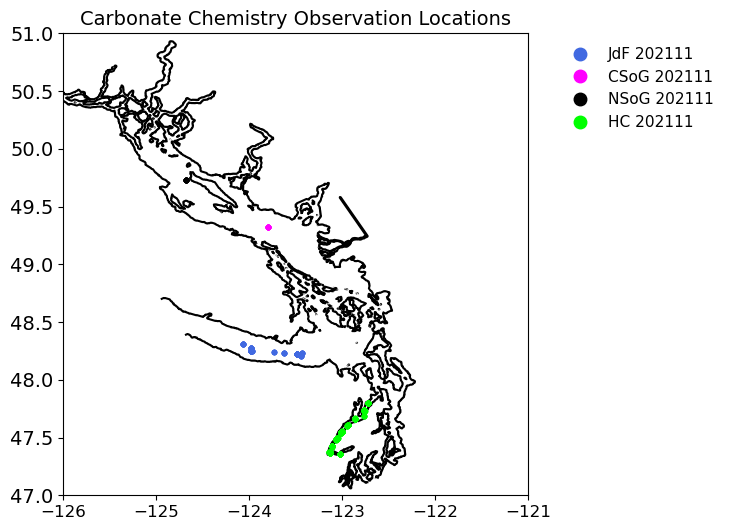

In [22]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1,color='k')
colors=('royalblue',
'fuchsia','black',
'lime','lightblue','mediumspringgreen',
'firebrick',
        'teal',

'darkviolet',
 'deepskyblue','darkgoldenrod',

'black','green','darkorange','deepskyblue','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data_202111.broadregions.dropna().unique()):
    datreg[iregion] = data_202111.loc[data_202111.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
plt.yticks(fontsize=12);
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121)
plt.xticks(fontsize=12);
ax.set_title('Carbonate Chemistry Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

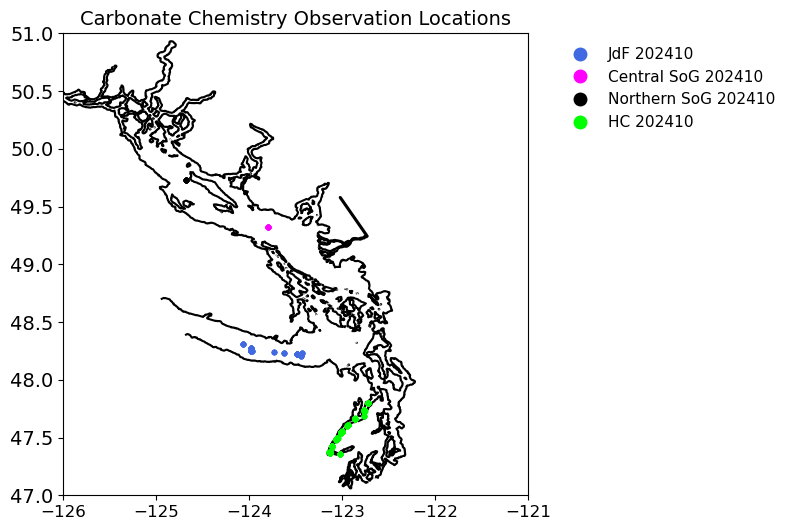

In [23]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1,color='k')
colors=('royalblue',
'fuchsia','black',
'lime','lightblue','mediumspringgreen',
'firebrick',
        'teal',

'darkviolet',
 'deepskyblue','darkgoldenrod',

'black','green','darkorange','deepskyblue','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data_202410.broadregions.dropna().unique()):
    datreg[iregion] = data_202410.loc[data_202410.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
plt.yticks(fontsize=12);
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121)
plt.xticks(fontsize=12);
ax.set_title('Carbonate Chemistry Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

#### Check plot of modelled salinity vs observed salinity matched by salinity

Text(0.5, 1.0, 'Salish Sea')

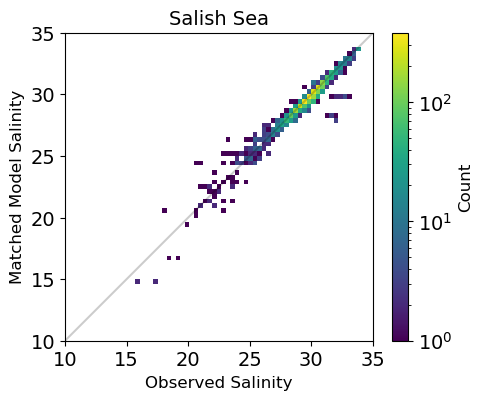

In [24]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
ii=(~np.isnan(data_202410['Sal (g kg-1)']))&(~np.isnan(data_202410['mod_vosaline']))
counts, xedges, yedges, m1=ax.hist2d((data_202410.loc[ii,['Sal (g kg-1)']].values.flatten()+.001),
                                      (data_202410.loc[ii,['mod_vosaline']].values.flatten()+.001),bins=25*2,norm=LogNorm())

ax.plot((10,35),(10,35),'k-',alpha=.2)
cb=fig.colorbar(m1)#,cax=axcb
cb.set_label('Count',fontsize=12)
ax.set_xlim(10,35)
ax.set_ylim(10,35)
ax.set_aspect(1)
ax.set_ylabel('Matched Model Salinity',fontsize=12)
ax.set_xlabel('Observed Salinity',fontsize=12)
ax.set_title('Salish Sea')

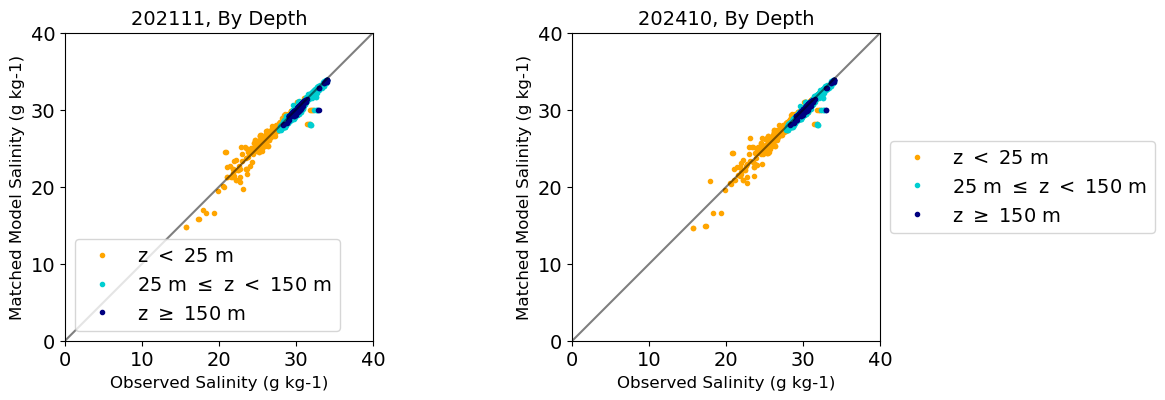

In [25]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
SS,l=byDepth21(ax[0],'Sal (g kg-1)','mod_vosaline',(0,40))
SS,l=byDepth24(ax[1],'Sal (g kg-1)','mod_vosaline',(0,40))
ax[0].set_title('202111, By Depth')
ax[1].set_title('202410, By Depth')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,40)
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,40)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Take a look at some evaluations for DIC, Total Alkalinity, DO

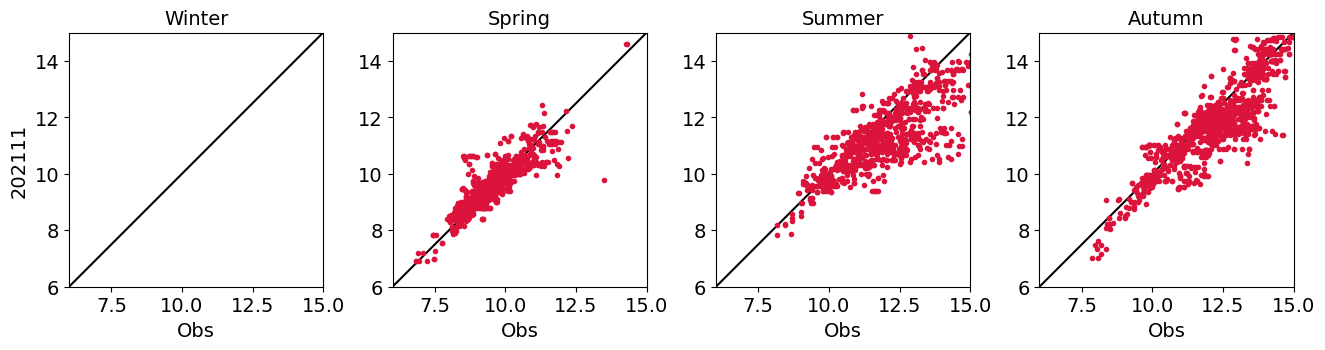

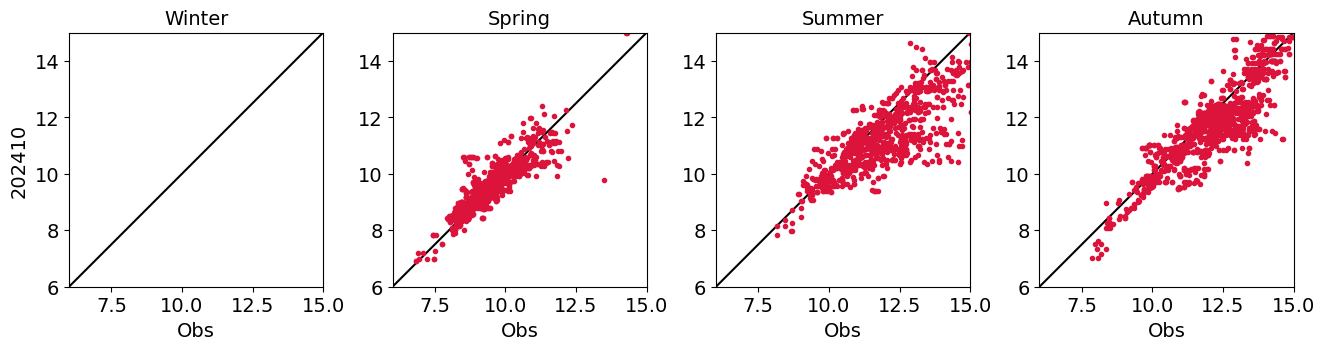

In [26]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason21(ax,'Temp (degC)','mod_votemper',(6,15))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'Temp (degC)','mod_votemper',(6,15))

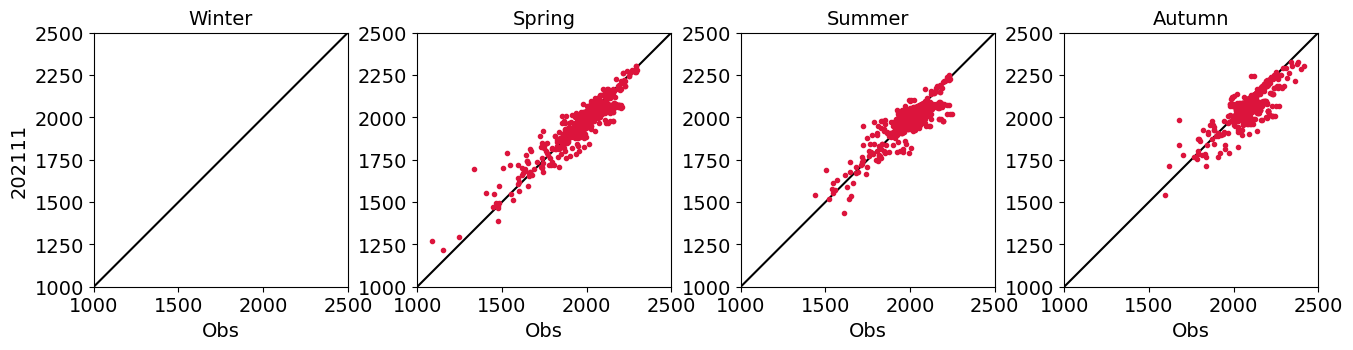

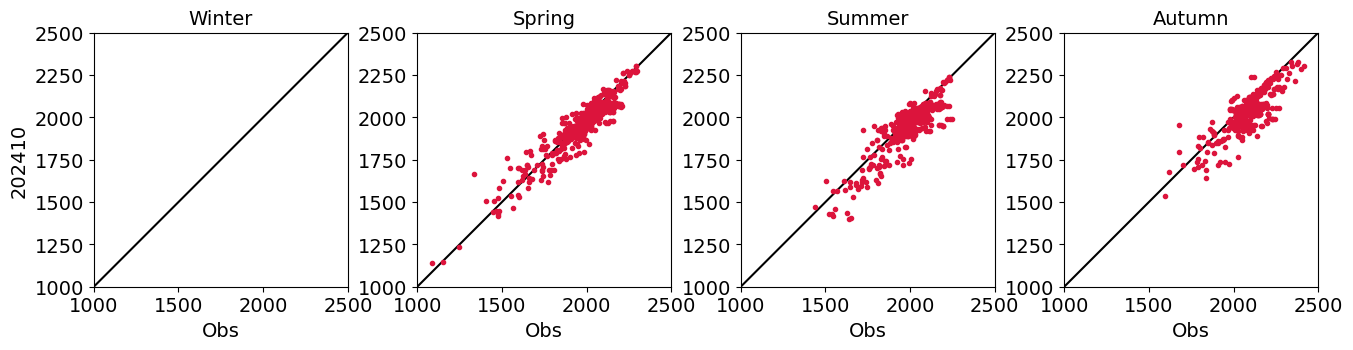

In [27]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason21(ax,'DIC (uM)','mod_dissolved_inorganic_carbon',(1000,2500))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'DIC (uM)','mod_dissolved_inorganic_carbon',(1000,2500))

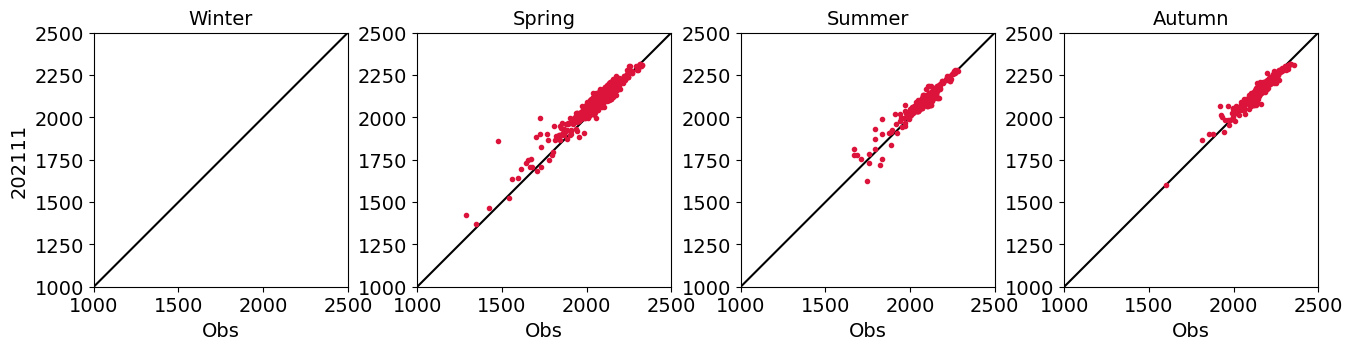

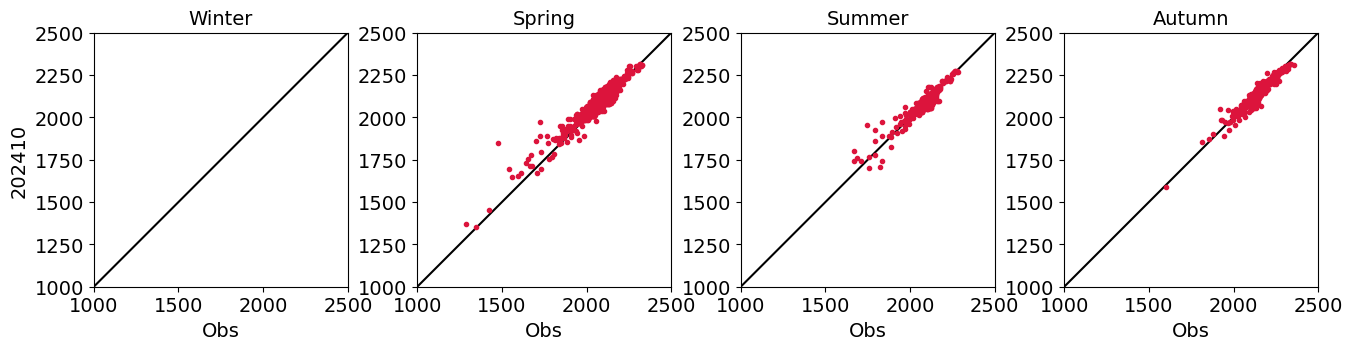

In [28]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason21(ax,'TA (uM)','mod_total_alkalinity',(1000,2500))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'TA (uM)','mod_total_alkalinity',(1000,2500))

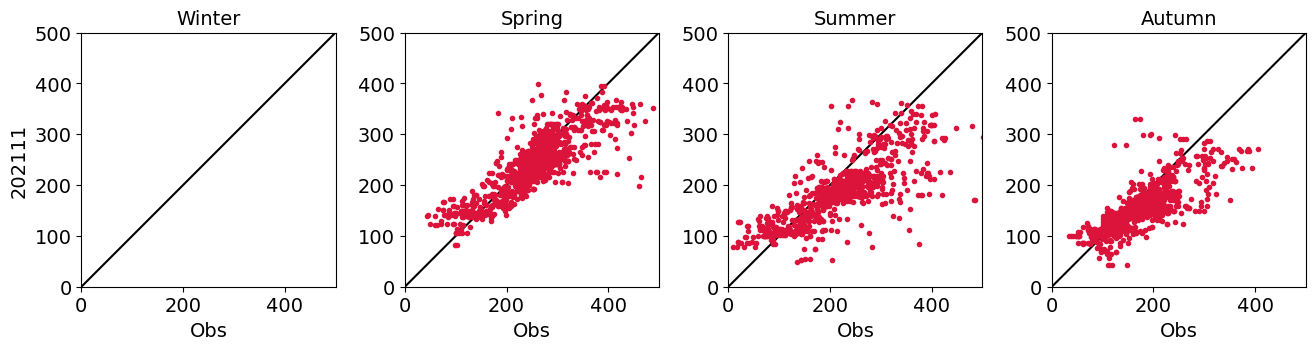

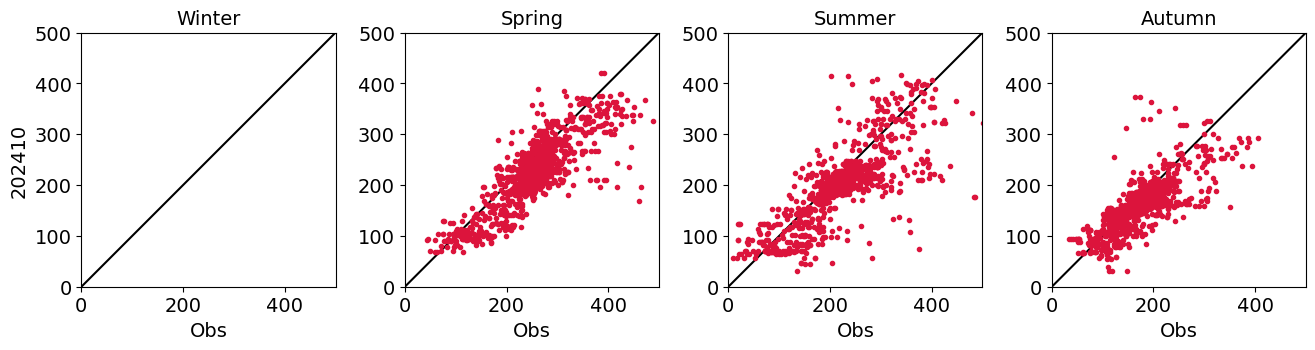

In [29]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason21(ax,'DO (uM)','mod_dissolved_oxygen',(0,500))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'DO (uM)','mod_dissolved_oxygen',(0,500))

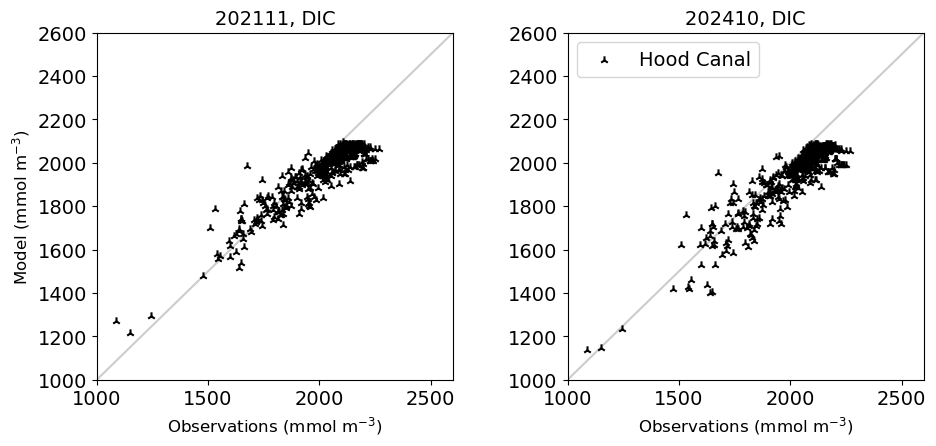

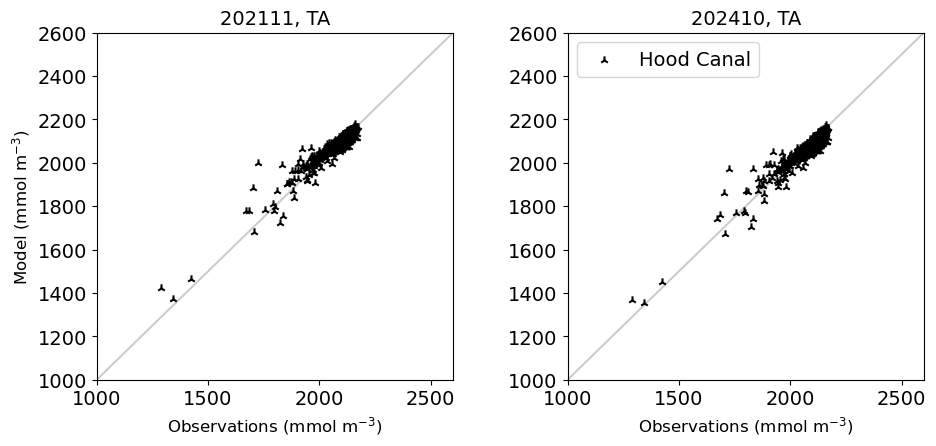

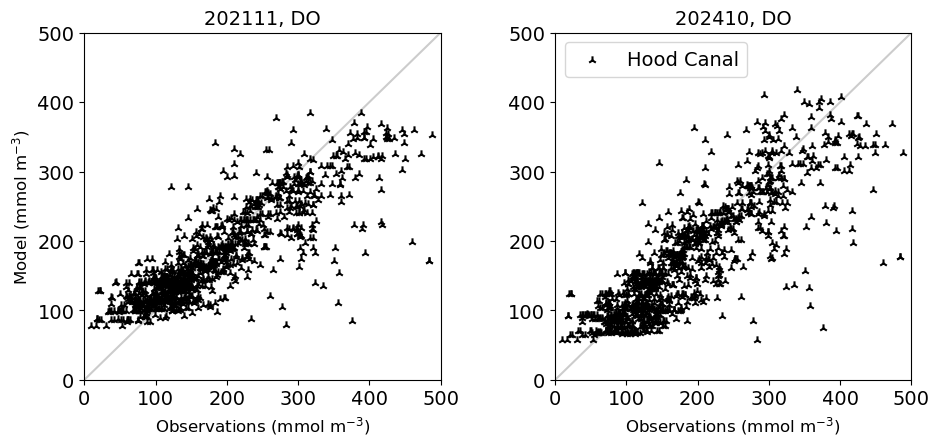

In [30]:
#################################################### DIC ################################################
fig, ax = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout(pad=3)
ax[0].scatter((HC21['DIC (uM)']),(HC21['mod_dissolved_inorganic_carbon']),color='black',label='Hood Canal',marker='2',zorder=4)
ax[1].scatter((HC24['DIC (uM)']),(HC24['mod_dissolved_inorganic_carbon']),color='black',label='Hood Canal',marker='2',zorder=4)

ax[0].set_ylim(1000,2600)
ax[0].set_xlim(1000,2600)
ax[0].plot((1000,2600),(1000,2600),'k-',alpha=.2)
ax[0].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[0].set_ylabel('Model (mmol m$^{-3}$)',fontsize=12)
ax[0].set_title('202111, DIC')
ax[1].set_ylim(1000,2600)
ax[1].set_xlim(1000,2600)
ax[1].plot((1000,2600),(1000,2600),'k-',alpha=.2)
ax[1].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[1].set_title('202410, DIC')
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend()
#################################################### TA ################################################
fig, ax = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout(pad=3)
ax[0].scatter((HC21['TA (uM)']),(HC21['mod_total_alkalinity']),color='black',label='Hood Canal',marker='2',zorder=4)
ax[1].scatter((HC24['TA (uM)']),(HC24['mod_total_alkalinity']),color='black',label='Hood Canal',marker='2',zorder=4)

ax[0].set_ylim(1000,2600)
ax[0].set_xlim(1000,2600)
ax[0].plot((1000,2600),(1000,2600),'k-',alpha=.2)
ax[0].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[0].set_ylabel('Model (mmol m$^{-3}$)',fontsize=12)
ax[0].set_title('202111, TA')
ax[1].set_ylim(1000,2600)
ax[1].set_xlim(1000,2600)
ax[1].plot((1000,2600),(1000,2600),'k-',alpha=.2)
ax[1].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[1].set_title('202410, TA')
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend()

#################################################### DO ################################################
fig, ax = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout(pad=3)
ax[0].scatter((HC21['DO (uM)']),(HC21['mod_dissolved_oxygen']),color='black',label='Hood Canal',marker='2',zorder=4)
ax[1].scatter((HC24['DO (uM)']),(HC24['mod_dissolved_oxygen']),color='black',label='Hood Canal',marker='2',zorder=4)

ax[0].set_ylim(0,500)
ax[0].set_xlim(0,500)
ax[0].plot((0,500),(0,500),'k-',alpha=.2)
ax[0].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[0].set_ylabel('Model (mmol m$^{-3}$)',fontsize=12)
ax[0].set_title('202111, DO')
ax[1].set_ylim(0,500)
ax[1].set_xlim(0,500)
ax[1].plot((0,500),(0,500),'k-',alpha=.2)
ax[1].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[1].set_title('202410, DO')
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend()

In [31]:
data_202111.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Cruise', 'dtUTC', 'Time', 'Lat', 'Lon',
       'Z', 'Temp (degC)', 'Temp (CT degC)', 'Sal (g kg-1)', 'Sal (PSS)',
       'DO (uM)', 'NO3 (uM)', 'NO2 (uM)', 'NH4 (uM)', 'PO4 (uM)', 'TA (uM)',
       'DIC (uM)', 'TA_FLAG', 'DIC_FLAG', 'Unnamed: 0', 'crid', 'ln', 'stn',
       'mon', 'day', 'dic', 'alk', 'OmegaA', 'obs_j', 'obs_i', 'Year', 'Month',
       'YMO', 'j', 'i', 'mod_dissolved_inorganic_carbon',
       'mod_total_alkalinity', 'mod_dissolved_oxygen', 'mod_votemper',
       'mod_vosaline', 'matched_salinity', 'broadregions'],
      dtype='object')